<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment01_1st_DNN_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


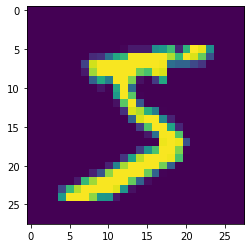

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#(28x28x1) (c) (3x3x1x5) => (28x28x5)
model.add(Convolution2D(filters=5, kernel_size=(3, 3), activation='relu', use_bias=False, padding='same', input_shape=(28,28,1)))
#(28x28x5) (c) (3x3x5x5) => (28x28x5)
model.add(Convolution2D(5, 3, activation='relu', use_bias=False, padding='same'))
#(28x28x5) (c) (3x3x5x10) => (28x28x10)
model.add(Convolution2D(10, 3, activation='relu', use_bias=False, padding='same'))
#(28x28x10) (c) (3x3x10x16) => (28x28x16)
model.add(Convolution2D(16, 3, activation='relu', use_bias=False, padding='same'))
#(28x28x16) (c) (3x3x16x32) => (28x28x32)
model.add(Convolution2D(32, 3, activation='relu', use_bias=False, padding='same'))


#(28x28x32) (MP) (2x2) => (14x14x32)
model.add(MaxPooling2D(2, 2))
#(14x14x32) (c) (1x1x32x10) => (14x14x10)
model.add(Convolution2D(10, 1, activation='relu'))


#(14x14x10) (c) (3x3x10x10) => (12x12x10)
model.add(Convolution2D(10, 3, activation='relu', use_bias=False))
#(12x12x10) (c) (3x3x10x16) => (10x10x16)
model.add(Convolution2D(16, 3, activation='relu', use_bias=False))
#(10x10x16) (c) (3x3x16x32) => (8x8x16)
model.add(Convolution2D(32, 3, activation='relu', use_bias=False))
model.add(Convolution2D(10, 8, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 5)         45        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 5)         225       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 10)        450       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 16)        1440      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        4608      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 10)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.1677 - acc: 0.9476
Epoch 2/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0512 - acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0377 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0298 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0238 - acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0210 - acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.0167 - acc: 0.9946
Epoch 8/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0147 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0137 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 24s 406us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03491256807185282, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.2115223e-15 1.3893142e-14 3.1023612e-12 3.0680608e-12 5.2264487e-23
  7.5888456e-16 1.2479412e-25 1.0000000e+00 2.4619011e-12 1.6998541e-11]
 [1.0282260e-13 3.0873768e-14 1.0000000e+00 2.7066823e-15 2.3316285e-19
  3.5294819e-21 1.0542237e-12 4.6698750e-18 2.5586892e-15 2.1826772e-22]
 [4.1279341e-12 9.9999762e-01 4.1212065e-09 9.3822498e-13 2.1105297e-06
  1.2935639e-07 2.5723406e-11 1.9978903e-09 9.7968211e-08 4.9553285e-11]
 [9.9999988e-01 9.5785264e-14 1.7941877e-08 1.0199450e-11 8.3744623e-15
  1.1797941e-12 6.7646745e-08 5.4666137e-12 9.8602904e-10 1.2363965e-09]
 [8.4047659e-16 5.1116883e-17 1.7380337e-13 7.5874234e-17 1.0000000e+00
  1.7514155e-16 1.5142344e-14 1.1486018e-16 1.8776272e-11 3.0290046e-12]
 [8.5818117e-15 9.9999821e-01 5.1387850e-10 1.8373144e-15 1.7301485e-06
  8.2805108e-12 3.5491716e-15 1.2519218e-08 5.4576293e-10 3.6907643e-12]
 [1.9256566e-19 4.3912908e-11 4.1989062e-10 1.8050013e-13 9.9999940e-01
  8.5277021e-14 2.9596432e-12 2.0437122e-13 2.1810258e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored